In [1]:
import numpy as np
import pandas as pd
import pickle
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

import imblearn

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.drop(['Unnamed: 0','ID'], axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
encode_feats = ['LIMIT_BAL','AGE']
encoder = LabelEncoder()

for i in range(len(encode_feats)):
    encoder.fit(df[encode_feats[i]])
    df[encode_feats[i]] = encoder.transform(df[encode_feats[i]])

In [7]:
scale_feats = df.iloc[:,11:23].columns.tolist()
scaler = MinMaxScaler()

for i in range(len(scale_feats)):
    scaler.fit(df[[scale_feats[i]]])
    df[[scale_feats[i]]] = scaler.transform(df[[scale_feats[i]]])

In [8]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,2,2,1,3,2,2,-1,-1,-2,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,12,2,2,2,5,-1,2,0,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,9,2,2,2,13,0,0,0,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,5,2,2,1,16,0,0,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,5,1,2,1,36,-1,0,-1,0,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
5,5,1,1,2,16,0,0,0,0,0,...,0.178407,0.100102,0.276367,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513,0
6,51,1,1,2,8,0,0,0,0,0,...,0.671310,0.559578,0.625196,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047,0
7,10,2,2,2,2,0,-1,-1,0,0,...,0.160346,0.080490,0.261414,0.000435,0.000357,0.000000,0.000936,0.003955,0.002917,0
8,14,2,3,1,7,0,0,2,0,0,...,0.171640,0.092342,0.263837,0.003811,0.000000,0.000482,0.001610,0.002345,0.001892,0
9,2,1,3,2,14,-2,-2,-2,-2,-1,...,0.160138,0.093545,0.271670,0.000000,0.000000,0.000000,0.020945,0.002631,0.000000,0


<AxesSubplot:>

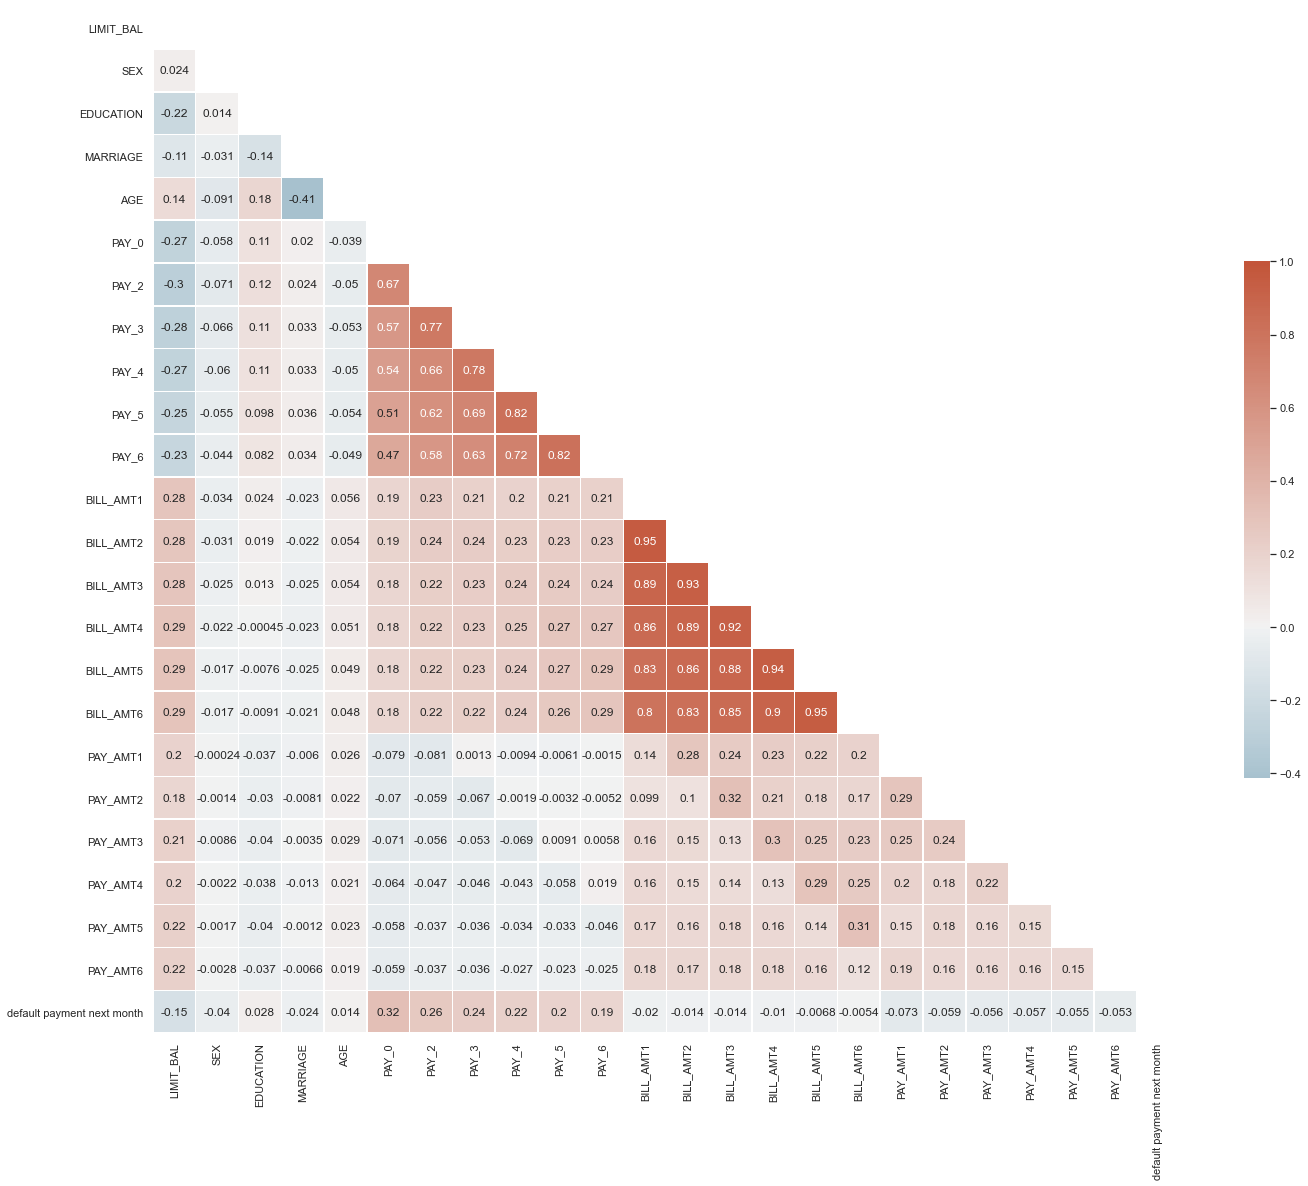

In [13]:
sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(23, 19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

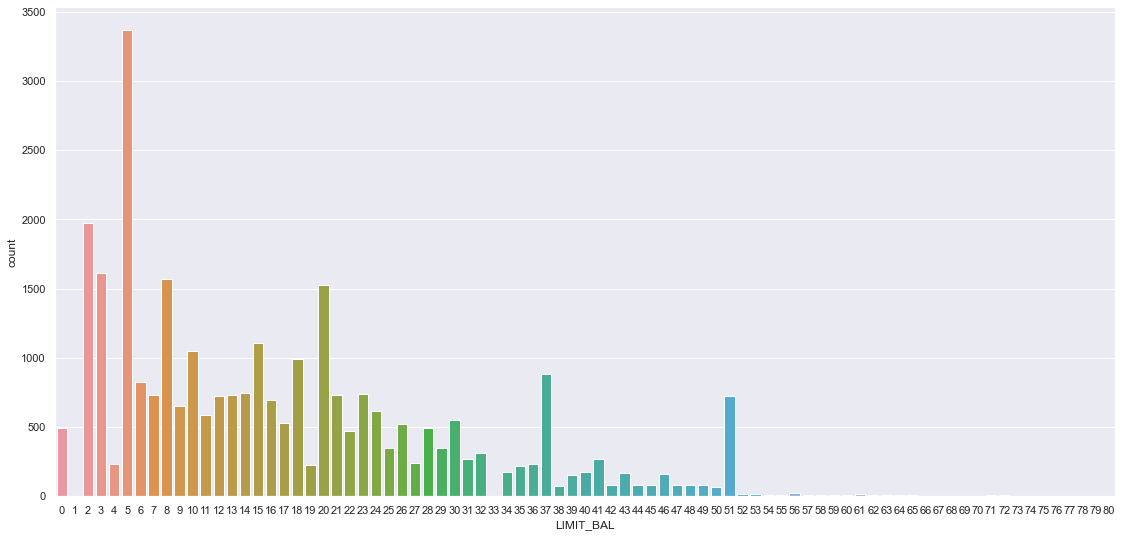

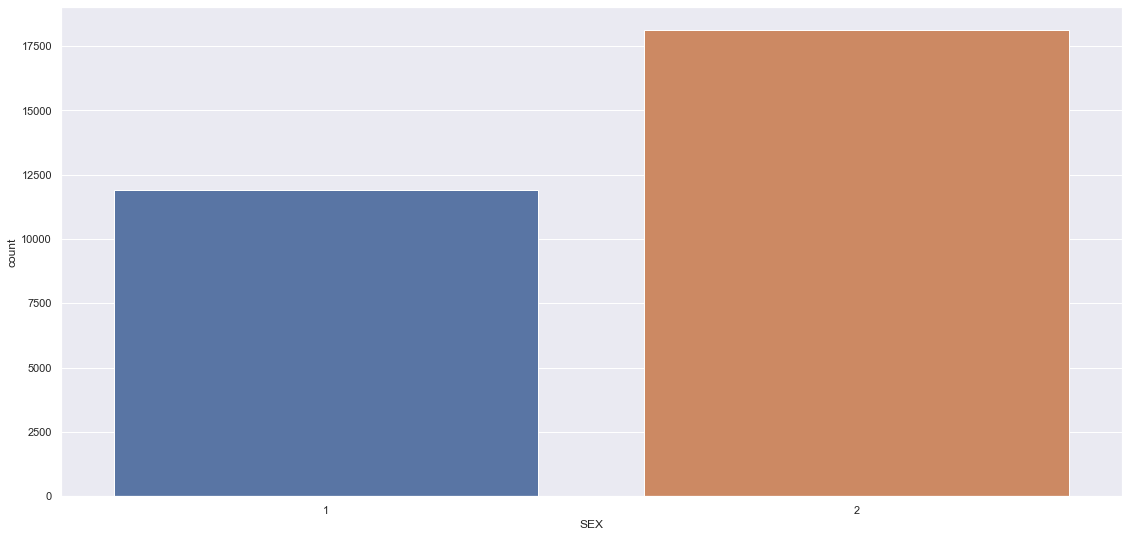

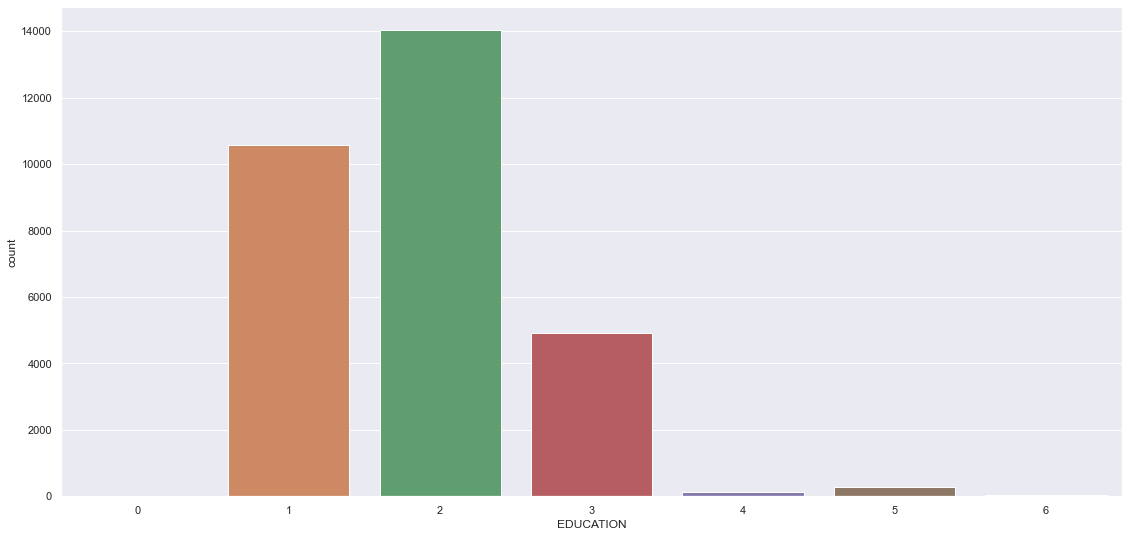

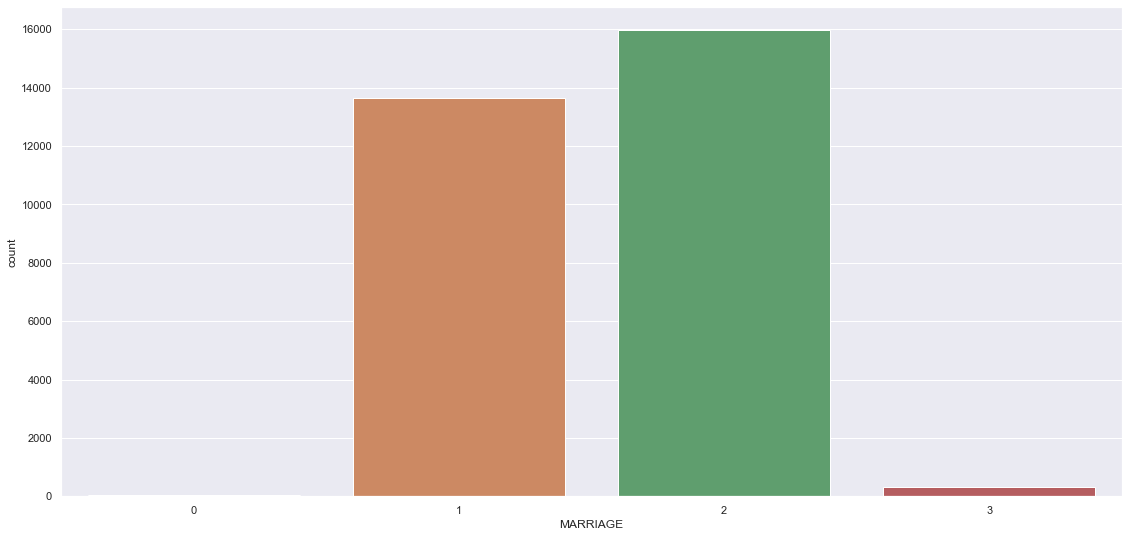

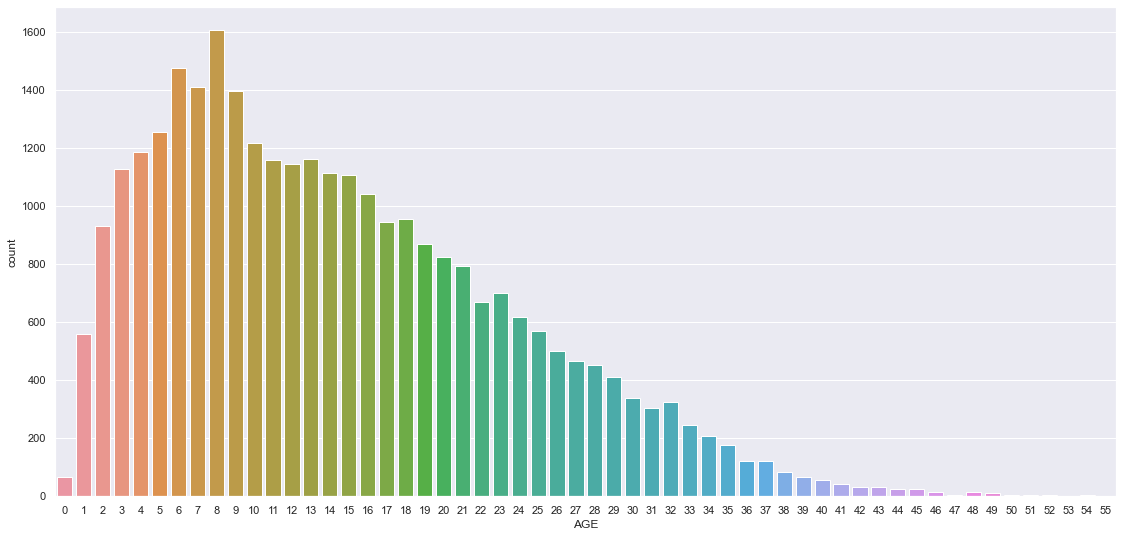

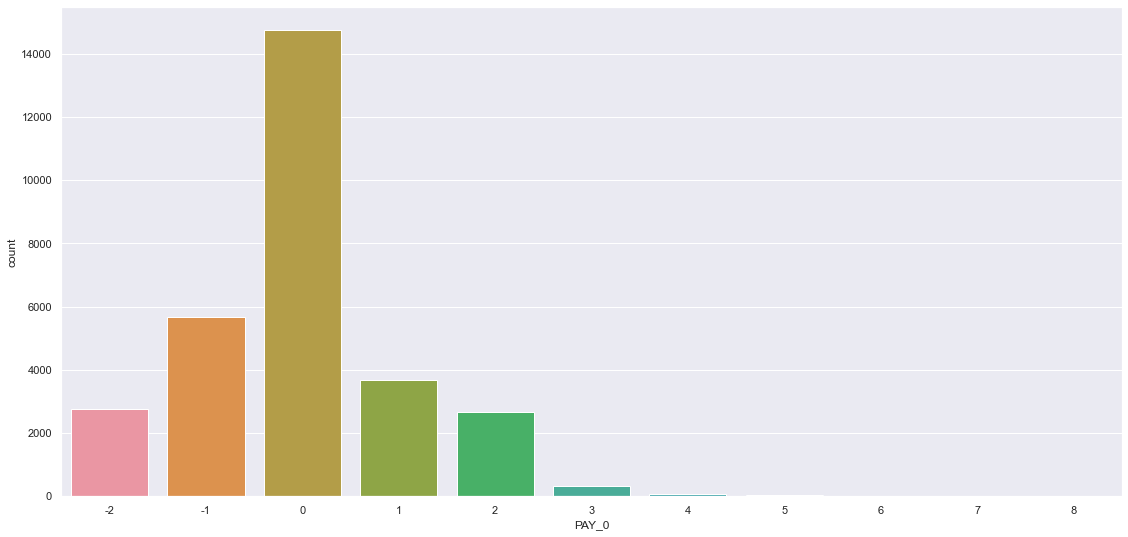

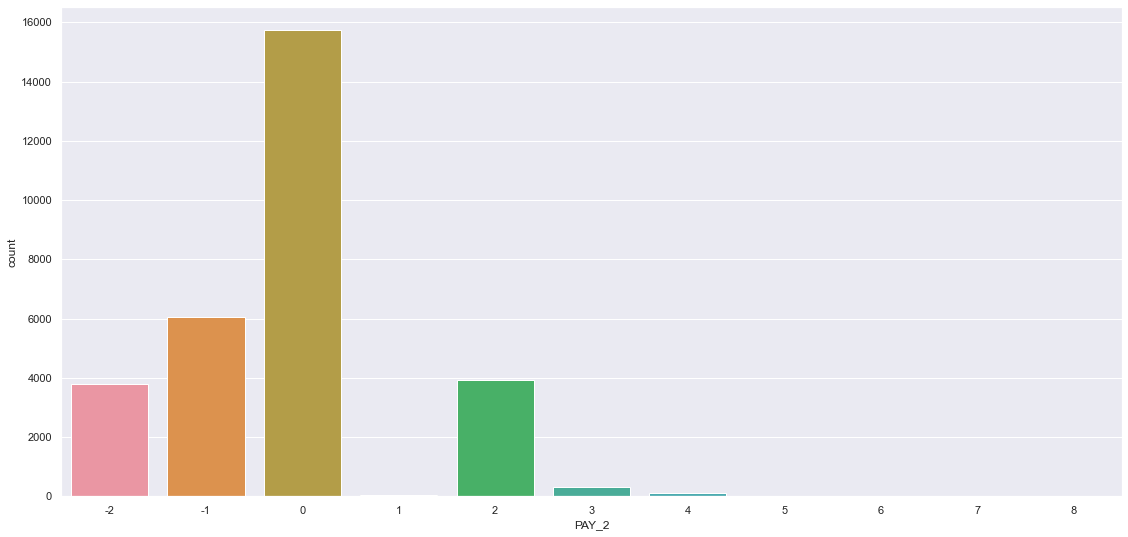

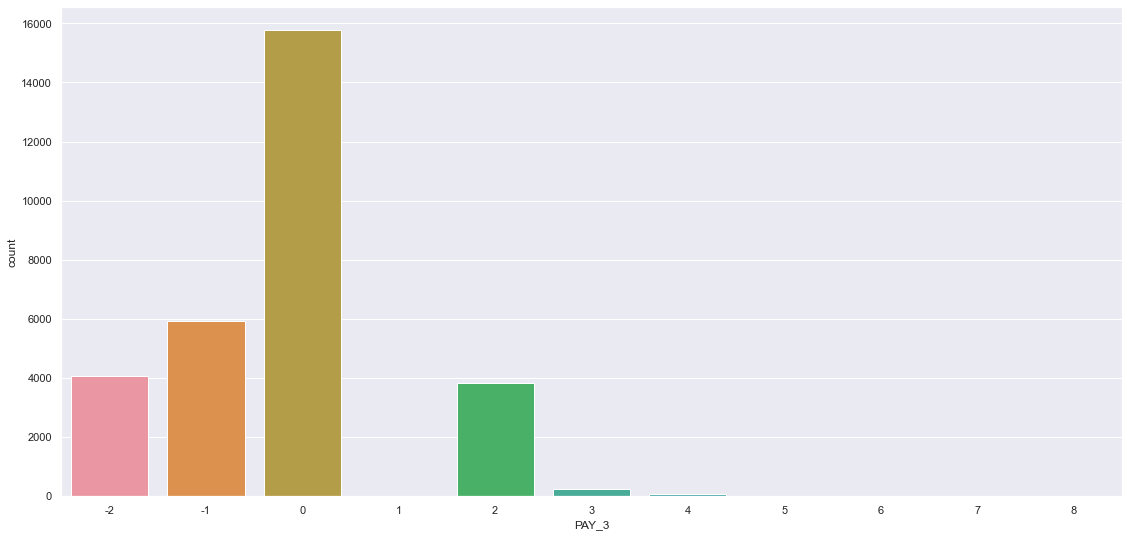

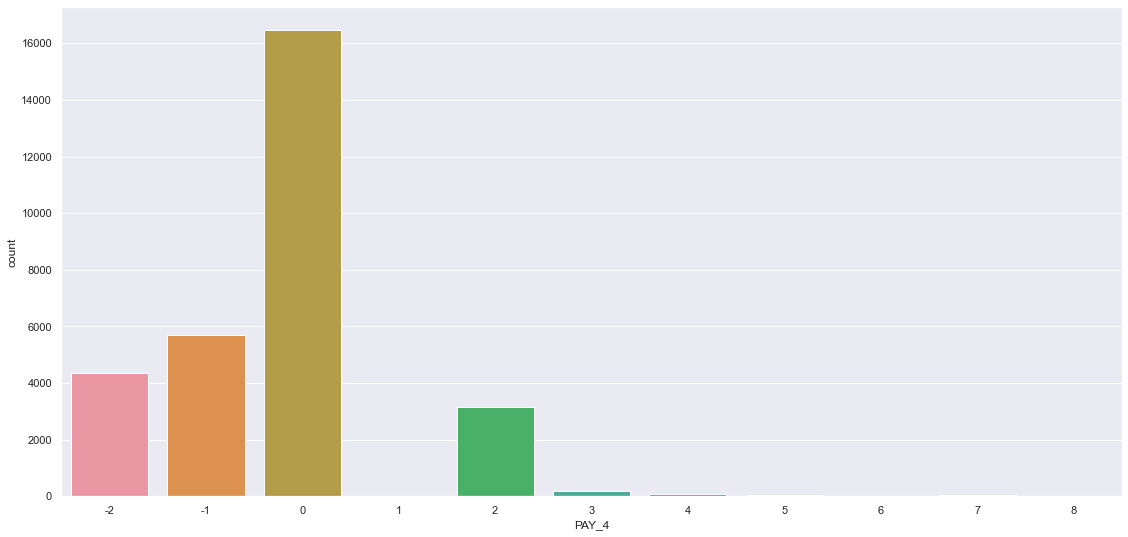

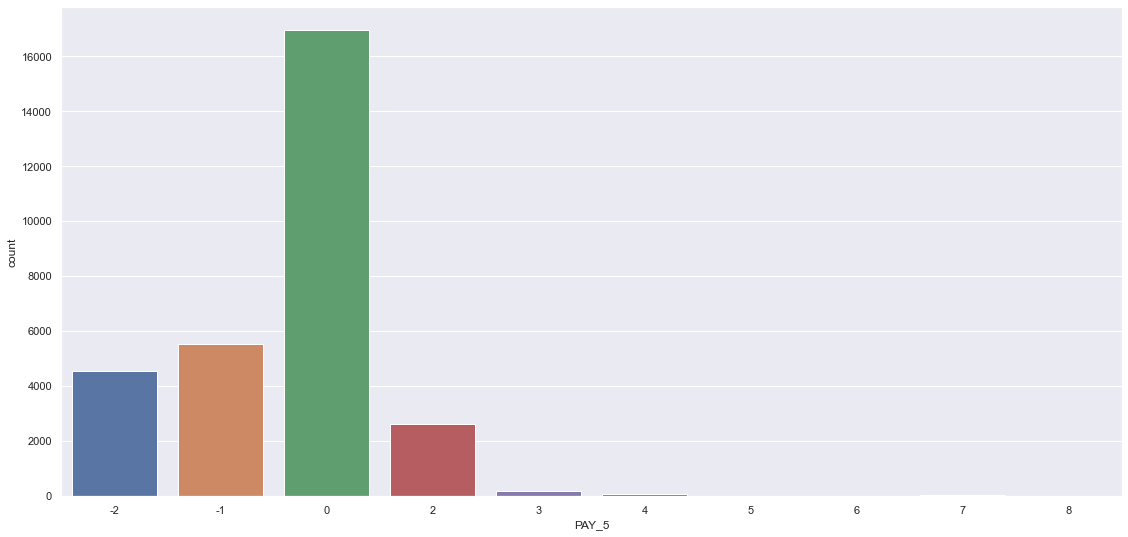

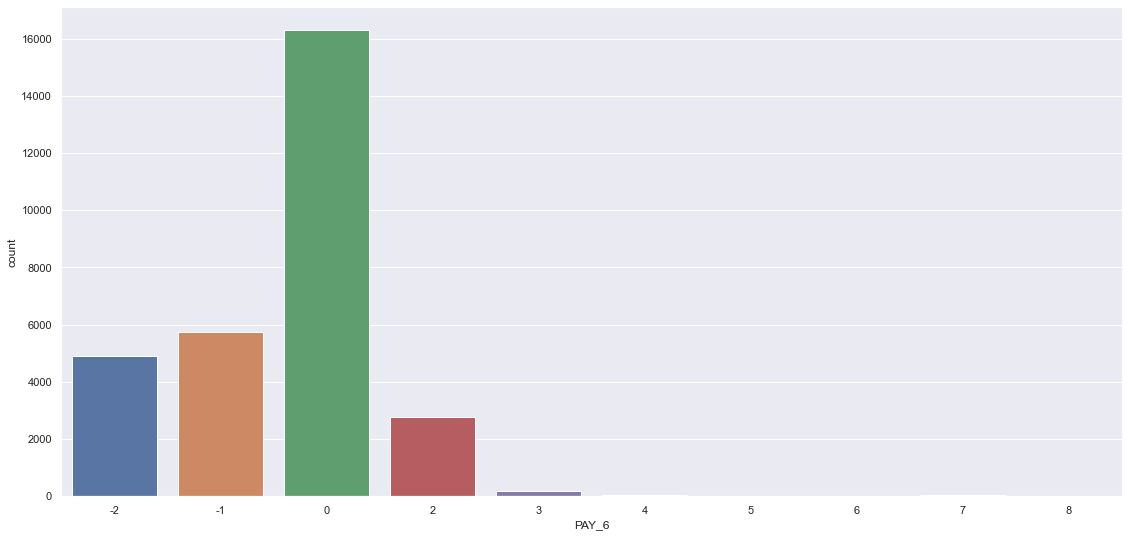

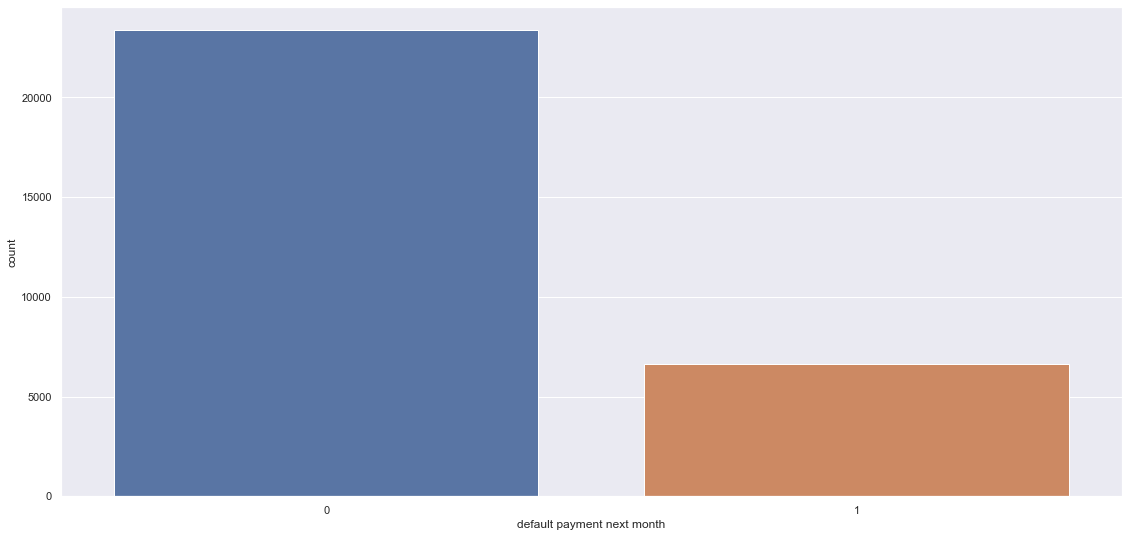

In [9]:
#plotting encoded features
encoded = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2',
           'PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']
sns.set(style='darkgrid')
for i in range(len(encoded)):
    plt.figure(figsize=(19,9))
    sns.countplot(x = encoded[i], data = df)
    plt.show()

In [10]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import  RandomUnderSampler
oversample =  RandomOverSampler(sampling_strategy='minority')
#under = RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = oversample.fit_resample(X, y)
#X_new, y_new = under.fit_resample(X, y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


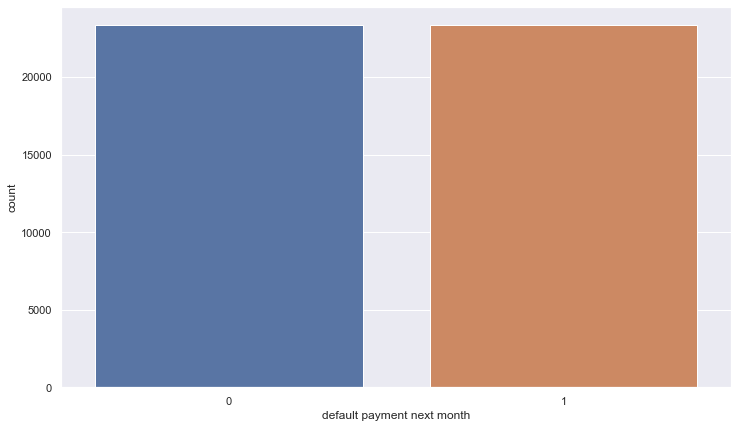

In [13]:
sns.set(style='darkgrid')

plt.figure(figsize=(12,7))
sns.countplot(y_new)
plt.show()

In [15]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

start_time = datetime.now()

knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred_train_knn = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('KNN: \n',classification_report(y_test,y_knn))

precision = precision_score(y_test, y_knn)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_knn)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_knn)
print('F1 score: %f\n' % f1)

print('MSE\'s train: ',mean_squared_error(y_train,y_pred_train_knn))
print('MSE\'s test: ',mean_squared_error(y_test,y_knn))
print('-'*60)

NB = GaussianNB().fit(X_train,y_train)
y_pred_train_NB = NB.predict(X_train)
y_NB = NB.predict(X_test)
print('Gaussian Naive Bayes: \n',classification_report(y_test,y_NB))

precision = precision_score(y_test, y_NB)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_NB)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_NB)
print('F1 score: %f\n' % f1)

print('MSE\'s train: ',mean_squared_error(y_train,y_pred_train_NB))
print('MSE\'s test: ',mean_squared_error(y_test,y_NB))
print('-'*60)

svc = SVC(C = 1, kernel = 'rbf').fit(X_train,y_train)
y_pred_train_svc = svc.predict(X_train)
y_svc = svc.predict(X_test)
print('Support Vector Classification: \n',classification_report(y_test,y_svc))

precision = precision_score(y_test, y_svc)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_svc)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_svc)
print('F1 score: %f\n' % f1)

print('MSE\'s train: ',mean_squared_error(y_train,y_pred_train_svc))
print('MSE\'s test: ',mean_squared_error(y_test,y_svc))

end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))

KNN: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73      4658
           1       0.72      0.83      0.77      4688

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.75      9346
weighted avg       0.76      0.76      0.75      9346

Precision: 0.722880
Recall: 0.832978
F1 score: 0.774034

MSE's train:  0.15734845647637902
MSE's test:  0.24395463299807404
------------------------------------------------------------
Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.70      0.36      0.47      4658
           1       0.57      0.85      0.68      4688

    accuracy                           0.61      9346
   macro avg       0.64      0.60      0.58      9346
weighted avg       0.64      0.61      0.58      9346

Precision: 0.571572
Recall: 0.850896
F1 score: 0.683809

MSE's train:  0.4027339361189877
MSE's test:  0.3947143162850417
--------

In [21]:
start_time = datetime.now()

knn_cross = KNeighborsClassifier()
scores_knn = cross_val_score(knn_cross, X_new, y_new, cv=10, scoring = 'f1')
print("KNN: %0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))

NB_cross = GaussianNB()
scores_NB = cross_val_score(NB_cross, X_new, y_new, cv=10, scoring = 'f1')
print("NB: %0.2f accuracy with a standard deviation of %0.2f" % (scores_NB.mean(), scores_NB.std()))

#svc_cross = SVC(C = 1, kernel = 'rbf')
#scores_SVC = cross_val_score(svc_cross, X_new, y_new, cv=10)
#print("SVC: %0.2f accuracy with a standard deviation of %0.2f" % (scores_SVC.mean(), scores_SVC.std()))

end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))

KNN: 0.79 accuracy with a standard deviation of 0.02
NB: 0.68 accuracy with a standard deviation of 0.01
Duration: 0:00:41.560272


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1)

model = Sequential()
model.add(Dense(200, input_dim = 23, activation='relu'))
model.add(Dense(50, activation='relu')),
model.add(Dense(50, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_split = 0.2, epochs= 1000, batch_size = 100, callbacks=[es], verbose = 1)

Epoch 1/1000
300/300 [==============================] - 3s 7ms/step - loss: 0.8307 - accuracy: 0.6049 - val_loss: 0.6323 - val_accuracy: 0.6096
Epoch 2/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6000 - accuracy: 0.6780 - val_loss: 0.6049 - val_accuracy: 0.6916
Epoch 3/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.5887 - accuracy: 0.6931 - val_loss: 0.5944 - val_accuracy: 0.6897
Epoch 4/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.5854 - accuracy: 0.6956 - val_loss: 0.5768 - val_accuracy: 0.7054
Epoch 5/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.5789 - accuracy: 0.6978 - val_loss: 0.5814 - val_accuracy: 0.7036
Epoch 00005: early stopping


In [19]:
y_nn = model.predict(X_test)
#n
y_nn = [np.argmax(i) for i in y_nn]
print(classification_report(y_test,y_nn))

precision = precision_score(y_test, y_nn)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_nn)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_nn)
print('F1 score: %f\n' % f1)

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      4658
           1       0.75      0.63      0.68      4688

    accuracy                           0.71      9346
   macro avg       0.71      0.71      0.71      9346
weighted avg       0.71      0.71      0.71      9346

Precision: 0.747727
Recall: 0.631613
F1 score: 0.684783

